# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from MetabolomicsPaper.GeneralHelperFunctions import *

paper_dir = '/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/Paper_v5/'
figure_dir = os.path.join(paper_dir, 'InSampleVsOutOfSample')
make_dir_if_not_exists(figure_dir)
os.chdir(paper_dir)

/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data

In [2]:
mb_oos_bs_dir = '/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/technical_noise/Grouped0.85/Bootstrapping/LightGBM/MB_daphna_LONG5_s/'
mb_oos_bse = pd.read_csv(os.path.join(mb_oos_bs_dir, 'bootstrapping_estimates.csv'), index_col=0).astype(float)
mb_oos = pd.read_csv(os.path.join(mb_oos_bs_dir, 'estimates.csv'), index_col=0).astype(float)

mb_lmm = pd.read_csv('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/LMMs/Results/technical_noise/MAR17/Metabolomics_grouped/Segata_s/LMM_results.txt', 
                     sep='\t', index_col=0)
mb_lmm['P value'] = mb_lmm['P value'].replace(0, 1e-10)
mb_lmm['q-val'] = fdr_correction(mb_lmm['P value'])[1]
mb_lmm = mb_lmm[mb_lmm['q-val'] < 0.05]
mb_lmm.shape

(317, 9)

# Plot

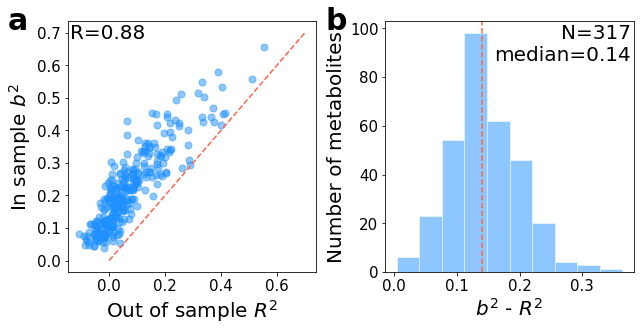

In [10]:
label_size = 20
tick_size = 15

fig, axes = plt.subplots(1, 2, figsize=(9, 4.5))
temp_est = mb_oos.copy()
r2_col = 'Coefficient_of_determination'
ax = axes[0]
ax.plot(temp_est[r2_col], 
        mb_lmm.reindex(temp_est.index, axis=0)['microbiome-association index'], 
        'o', markersize=7, alpha=0.5, color='dodgerblue')
ax.plot([0, 0.7], [0, 0.7], '--', color='tomato')
ax.set_xlabel('Out of sample $R^2$', fontsize=label_size)
ax.set_ylabel('In sample $b^2$', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
r, p = pearsonr_rmna(temp_est[r2_col], 
                     mb_lmm.reindex(temp_est.index, axis=0)['microbiome-association index'])
add_text_at_corner(ax, 'R=%0.2g'%r, 'top left', fontsize=label_size)
ax = axes[1]
diffs = mb_lmm.reindex(temp_est.index, axis=0)['microbiome-association index'] - temp_est[r2_col]
median = diffs.median()
ax.hist(diffs.dropna(), bins=10, color='dodgerblue', alpha=0.5, ec='white')
ax.axvline(x=median, linestyle='--', color='tomato')
ax.set_xlabel('$b^2$ - $R^2$', fontsize=label_size)
ax.set_ylabel('Number of metabolites', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
add_text_at_corner(ax, 'N=%0.1d'%mb_lmm.reindex(temp_est.index, axis=0).dropna().shape[0], 'top right', fontsize=label_size)
add_text_at_corner(ax, '\nmedian=%0.2g'%median, 'top right', fontsize=label_size)

fig.tight_layout()

plt.text(-0.2, 1.0, 'a', ha='center', va='center', transform=axes[0].transAxes, fontsize=30, weight='bold')
plt.text(-0.2, 1.0, 'b', ha='center', va='center', transform=axes[1].transAxes, fontsize=30, weight='bold')

plt.savefig(os.path.join(figure_dir, 'LMM_vs_prediction_Segata_species_scatterplot_hist_of_diffs_small.png'), dpi=200, bbox_inches='tight')
plt.savefig(os.path.join(figure_dir, 'LMM_vs_prediction_Segata_species_scatterplot_hist_of_diffs.png'), dpi=1200, bbox_inches='tight')

In [5]:
median

0.13958722099400492